In [59]:
import gph 
import persistent_homology
import viz
import numpy as np
import matplotlib.pyplot as plt

In [60]:
def synthetic_circle(num_points, noise_var):
    theta = 2*np.pi*np.random.sample(num_points)
    x = np.cos(theta)
    y = np.sin(theta) 

    circ = np.stack([x, y])
    circ_noise = np.stack([x, y])
    circ_noise += np.random.normal(0, noise_var, circ_noise.shape)
                
    return circ, circ_noise

In [61]:
circ, circ_noise = synthetic_circle(100, 0.05)
print("circ:", circ)
print("circ_noise:", circ_noise)

circ: [[-1.37387597e-01  9.71327738e-01  1.61101602e-01 -8.52410667e-01
  -8.03432101e-01  4.13787451e-01 -7.08887135e-01 -9.61414175e-01
   7.82740542e-01  9.89613309e-01 -9.53517879e-01  9.18706337e-01
  -8.14357141e-01 -9.53435572e-01 -8.99958614e-01 -9.11023716e-01
  -8.18038458e-01  7.30816623e-01 -2.12244161e-01 -9.41649686e-01
  -9.79217518e-01  4.59124166e-01 -8.29271533e-01 -9.47090667e-01
  -8.27445132e-01 -1.29031169e-01  6.59522667e-01  5.89255928e-01
  -6.38798754e-01  8.95300540e-01 -3.98737204e-01  9.39135456e-01
  -9.92217658e-01 -9.49252493e-01 -8.19037796e-01 -9.11771805e-01
  -7.98748550e-01 -3.72914404e-01 -3.37276938e-01 -8.62660624e-02
  -8.74951586e-01 -8.02926016e-01 -3.84212699e-01  4.26804579e-01
  -9.03055210e-01 -9.90324155e-02  6.15012877e-02 -7.83280573e-01
   9.96476538e-01 -8.03643356e-01 -3.22443819e-01  7.79108209e-01
  -6.47936726e-01  9.89520379e-01  9.78135697e-01  5.41773833e-01
   8.63948119e-01  4.09067355e-02 -6.35324468e-01  5.30025840e-01
   8

In [62]:
circ.shape
circ_noise.shape

(2, 100)

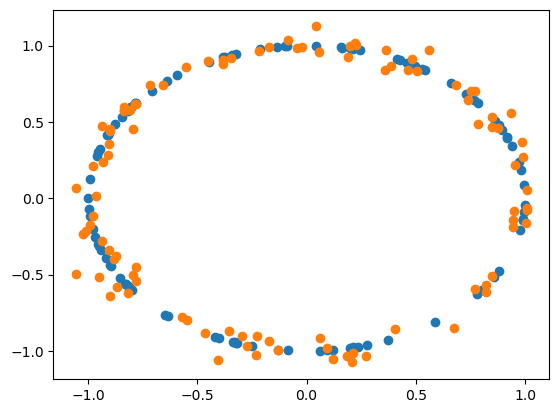

In [63]:
x = circ[0,:]
y = circ[1,:]

x_noise = circ_noise[0,:]
y_noise = circ_noise[1,:]

plt.scatter(x,y)
plt.scatter(x_noise, y_noise)

In [64]:
circ_trans = circ.T
circ_noise_trans = circ_noise.T

In [65]:
pers = gph.ripser_parallel(circ_trans, 2)
diagrams = pers["dgms"]

'compute_persistence_diagrams' executed in 0.0229s
'compute_persistence_diagrams' executed in 0.0104s


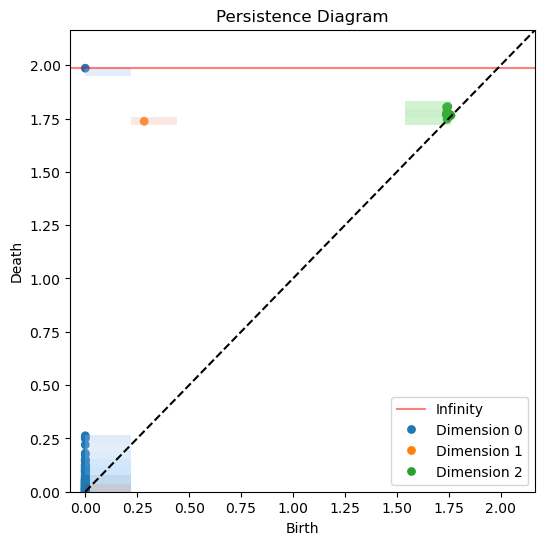

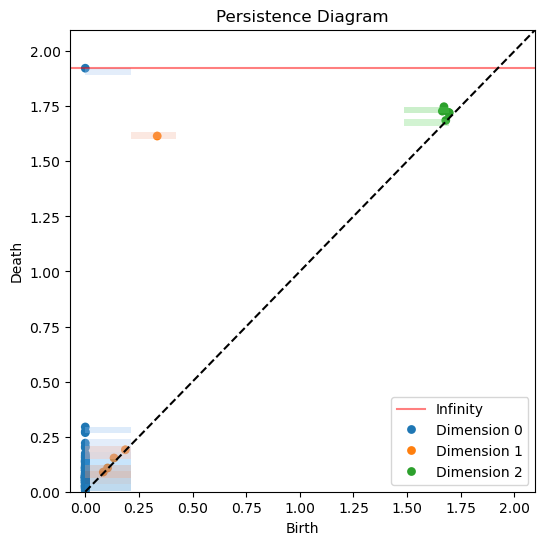

In [66]:
diagrams = persistent_homology.compute_persistence_diagrams(circ_trans, maxdim=2, n_threads=-1)
diagrams_noise = persistent_homology.compute_persistence_diagrams(circ_noise_trans, maxdim=2, n_threads=-1)

viz.plot_persistence_diagrams(diagrams, density=True)
viz.plot_persistence_diagrams(diagrams_noise, density=True)